In [4]:
import polars as pl
import rdkit.Chem as Chem

In [5]:
# Read test data using polars
data_path = "../data/raw/test.parquet"
data = pl.read_parquet(data_path)

In [6]:
data.head()

id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
i64,str,str,str,str,str
295246830,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""C=Cc1ccc(N)cc1""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""BRD4"""
295246831,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""C=Cc1ccc(N)cc1""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""HSA"""
295246832,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""C=Cc1ccc(N)cc1""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""sEH"""
295246833,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""CC(O)Cn1cnc2c(N)ncnc21""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""BRD4"""
295246834,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""CC(O)Cn1cnc2c(N)ncnc21""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""HSA"""


In [7]:
data = data.to_pandas()

In [8]:
# Take rows with unique values in buildingblock1_smiles
unique_buildingblock1 = data.drop_duplicates(subset=["buildingblock1_smiles"])

# To create a product from the building blocks
Train set
1. FMOC reacts with triazine core
2. NH2 or NH groups react with triazine core

Test set
1. Boronate on bb reacts with Halide
2. COOH on bb reacts with FMOC
3. DNA reacts with NH

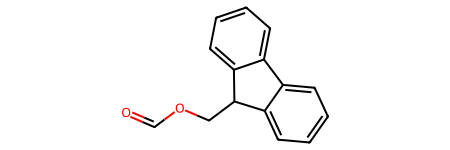

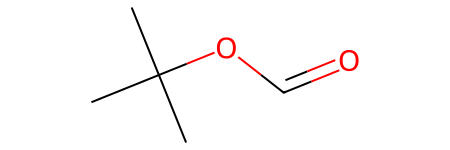

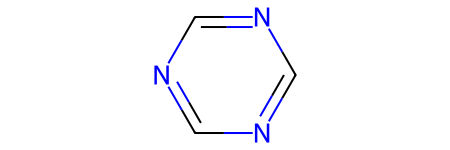

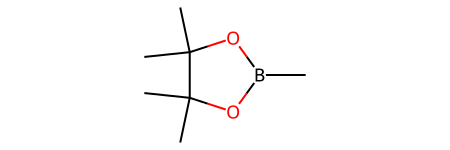

In [200]:
FMOC_SMILE = "O=COCC1c2ccccc2-c2ccccc21"
BOC_SMILE = "C(=O)OC(C)(C)C"
TRIAZINE_SMILE = "c1ncncn1"
BORONATE = "CB1OC(C)(C)C(C)(C)O1"

# Show fmoc and boc
FMOC = Chem.MolFromSmiles(FMOC_SMILE)
BOC = Chem.MolFromSmiles(BOC_SMILE)
TRIAZINE = Chem.MolFromSmiles(TRIAZINE_SMILE)
BORONATE = Chem.MolFromSmiles(BORONATE)
display(FMOC)
display(BOC)
display(TRIAZINE)
display(BORONATE)

In [369]:
FMOC_TRIAZINE_SMART = '[*:1]C(=O)OCC1c2ccccc2-c2ccccc21>>c1nc([*:1])ncn1'
reaction_fmoc_triazine = Chem.rdChemReactions.ReactionFromSmarts(FMOC_TRIAZINE_SMART)
NH2_TRIAZINE_SMART1 = '[cH:1]1nc([*:3])ncn1.[NH2;!$(N-[#66]):2]>>[c:1]([*:3])1ncnc([NH:2])n1' 
reaction_nh2_triazine1 = Chem.rdChemReactions.ReactionFromSmarts(NH2_TRIAZINE_SMART1)
NH_TRIAZINE_SMART1 = '[cH:1]1nc([*:3])ncn1.[Nh;!$(N-[#66]):2]>>[c:1]([*:3])1ncnc([N:2])n1' 
reaction_nh_triazine1 = Chem.rdChemReactions.ReactionFromSmarts(NH_TRIAZINE_SMART1)
NH2_TRIAZINE_SMART2 = '[cH:1]1nc([*:3])nc([*:4])n1.[NH2;!$(N-[#66]):2]>>[c:1]([*:3])1nc([*:4])nc([NH:2])n1'
reaction_nh2_triazine2 = Chem.rdChemReactions.ReactionFromSmarts(NH2_TRIAZINE_SMART2)
NH_TRIAZINE_SMART2 = '[cH:1]1nc([*:3])nc([*:4])n1.[Nh;!$(N-[#66]):2]>>[c:1]([*:3])1nc([*:4])nc([N:2])n1'
reaction_nh_triazine2 = Chem.rdChemReactions.ReactionFromSmarts(NH_TRIAZINE_SMART2)

BORONATE_HALIDE_SMART = '[*:1]([I,Br,Cl,F]).[*:2]B1OC(C)(C)C(C)(C)O1>>[*:1]([*:2])'
reaction_boronate_halide = Chem.rdChemReactions.ReactionFromSmarts(BORONATE_HALIDE_SMART)
COOH_BOC_SMART = '[*:1]C(=O)OC(C)(C)C.[*:2]C(=O)O>>[*:1]C(=O)[*:2]'
reaction_cooh_boc = Chem.rdChemReactions.ReactionFromSmarts(COOH_BOC_SMART)

#DNA_COOH_SMART = 'C' # Always on the first bb
#reaction_dna_cooh = Chem.rdChemReactions.ReactionFromSmarts(DNA_COOH_SMART)

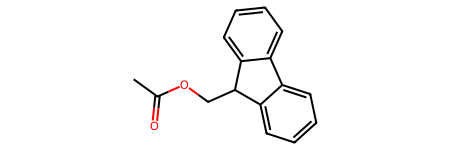

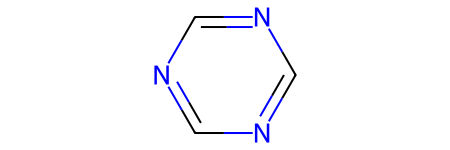

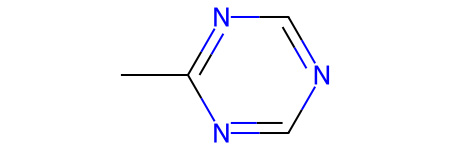

In [371]:
test1 = Chem.MolFromSmiles("CC(=O)OCC1c2ccccc2-c2ccccc21")
test2 = Chem.MolFromSmiles(TRIAZINE_SMILE)

# Check if smart matches to test1

display(test1)
display(test2)
#reaction = reaction_nh2_triazine
product = reaction_fmoc_triazine.RunReactants([test1])

# print(reaction_boronate_halide.IsMoleculeReactant(test1))
# print(reaction_boronate_halide.IsMoleculeReactant(test2))

display(product[0][0])

In [178]:
def sanitize_molecule(mol):
    try:
        Chem.SanitizeMol(mol)
    except Chem.MolSanitizeException as e:
        raise ValueError(f"Sanitization failed: {e}")

In [384]:
def create_product(bb1: str, bb2: str, bb3: str) -> Chem.Mol:
    BB1 = Chem.MolFromSmiles(bb1)
    BB2 = Chem.MolFromSmiles(bb2)
    BB3 = Chem.MolFromSmiles(bb3)

    # If BB1 has FMOC, do FMOC triazine reaction
    result = BB1
    if BB1.HasSubstructMatch(FMOC):
        # Use FMOC_TRIAZINE_SMART to replace FMOC with triazine
        products = reaction_fmoc_triazine.RunReactants([BB1]) 
        if len(products) == 0:
            raise ValueError("No products were generated")
        result = products[0][0]
        sanitize_molecule(result)

    # Add DNA to the product using replace substructs COOH becomes CONHDy
    if result.HasSubstructMatch(Chem.MolFromSmiles('CC(=O)O')):
        # Replace substructs COOH with CONHDy
        result = Chem.ReplaceSubstructs(result, Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('CC(=O)N[Dy]'))[0]
        sanitize_molecule(result)
    
    # If there is a triazine in the product, do NH2 triazine reaction
    sanitize_molecule(result) 
    if result.HasSubstructMatch(TRIAZINE):
        # Use NH2_TRIAZINE_SMART1 to replace triazine with NH2 for BB2
        products = reaction_nh2_triazine1.RunReactants((result, BB2))
        if len(products) == 0:
            raise ValueError("No products were generated")
        result = products[0][0]
        sanitize_molecule(result) 
        # Use NH2_TRIAZINE_SMART2 to replace triazine with NH2 for BB3
        products = reaction_nh2_triazine2.RunReactants((result, BB3))
        if len(products) == 0:
            raise ValueError("No products were generated")
        result = products[0][0]
        sanitize_molecule(result)
    elif result.HasSubstructMatch(Chem.MolFromSmiles('Br')) or result.HasSubstructMatch(Chem.MolFromSmiles('Cl')) or result.HasSubstructMatch(Chem.MolFromSmiles('I')) or result.HasSubstructMatch(Chem.MolFromSmiles('F')):
        # Use BORONATE_HALIDE_SMART to replace boronate with halide
        products = reaction_boronate_halide.RunReactants([result, BB2]) 
        if len(products) == 0:
            raise ValueError("No products were generated")
        result = products[0][0]
        sanitize_molecule(result)

        # Use COOH_BOC_SMART to replace BOC with COOH
        products = reaction_cooh_boc.RunReactants([result, BB3])
        if len(products) == 0:
            raise ValueError("No products were generated")
        result = products[0][0]
        sanitize_molecule(result)
    


    return result 

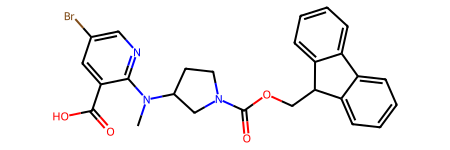

In [403]:
# Special row
spec_row = unique_buildingblock1.iloc[49]

# Display the row buildingblock1_smiles, buildingblock2_smiles, buildingblock3_smiles, and the molecule_smiles
spec_row_mol = [Chem.MolFromSmiles(spec_row["buildingblock1_smiles"]), Chem.MolFromSmiles(spec_row["buildingblock2_smiles"]), Chem.MolFromSmiles(spec_row["buildingblock3_smiles"])]
display(spec_row_mol[0])

In [400]:
# Draw the buildingblock1_smiles, buildingblock2_smiles, buildingblock3_smiles and molecule_smiles columns

# Draw rows with step 3
rows = unique_buildingblock1.iloc[49]
# rows = rows[::3]

# Draw the rows in a grid
grid = []
for i, row in rows.iterrows():
    result = create_product(row["buildingblock1_smiles"], row["buildingblock2_smiles"], row["buildingblock3_smiles"])

    # Check if the result is the same as the molecule_smiles
    if not result.HasSubstructMatch(Chem.MolFromSmiles(row["molecule_smiles"])):
        grid.append([Chem.MolFromSmiles(row["buildingblock1_smiles"]),
                     Chem.MolFromSmiles(row["buildingblock2_smiles"]),
                     Chem.MolFromSmiles(row["buildingblock3_smiles"]),
                     result,
                     Chem.MolFromSmiles(row["molecule_smiles"])])

    # grid.append([Chem.MolFromSmiles(row["buildingblock1_smiles"]),
    #                                        Chem.MolFromSmiles(row["buildingblock2_smiles"]),
    #                                        Chem.MolFromSmiles(row["buildingblock3_smiles"]),
    #                                        result,
    #                                        Chem.MolFromSmiles(row["molecule_smiles"])]),

# If result == molecule_smiles, the reaction is correct
# If result != molecule_smiles, the reaction is incorrect
# If result == None, the reaction failed
# Draw the molecules in a grid giving the smiles as labels, color the molecule in red if the reaction failed
if len(grid) == 0:
    raise ValueError("No molecules were generated")
img = Chem.Draw.MolsToGridImage([mol for row in grid for mol in row], 
                                 molsPerRow=5, maxMols=500, subImgSize=(300, 300)) 
img

ValueError: No products were generated